Ejemplo modificado de: https://medium.com/@Cambridge_Spark/tutorial-introduction-to-missing-data-imputation-4912b51c34eb

# Bibliotecas

In [19]:
import numpy as np
import seaborn as sb
import pandas as pd
from matplotlib import pyplot as plt

# Obtención de datos 
*****

El dataset "tips" permite analizar como es el comportamiento de las propinas que se da a los meseros, la que se ve influenciada por muchos factores, incluida la naturaleza del restaurante, el tamaño del loca, ubicación de la mesa. A los dueños de los restaurantes (por ej. en US) les interesa saber qué factores influyen en las propinas, para así realizar asignación de mesa a los meseros, ya que buscan evitar "injusticas" en las asignaciones.


In [5]:
tips = sb.load_dataset("tips")
display(tips)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Subconjunto de datos
Para este ejemplo, solo se usarán tres variables: total_bill, size y tip

In [6]:
df = tips.loc[:,['total_bill', "size","tip"]]
display(df)

,total_bill,size,tip
0,16.99,2,1.01
1,10.34,3,1.66
2,21.01,3,3.50
3,23.68,2,3.31
4,24.59,4,3.61
...,...,...,...
239,29.03,3,5.92
240,27.18,2,2.00
241,22.67,2,2.00
242,17.82,2,1.75


Se agregan *missing values*.

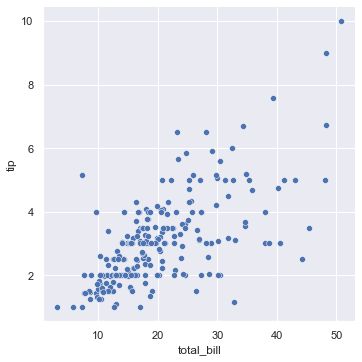

In [41]:
sb.set(style="darkgrid")
sb.relplot(x = "total_bill", y = "tip", data = df);

In [23]:
# Agregando datos faltantes en variable size
df.loc[0:20, "size"] = np.nan

# Agregando datos faltantes en variable total_bill
df.loc[220:230, "total_bill"] = np.nan

## Correlación

In [12]:
df_drop = df.dropna(axis=0)
corr = df_drop.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)


,total_bill,size,tip
total_bill,1.00,0.60,0.67
size,0.60,1.00,0.50
tip,0.67,0.50,1.00


- Las variables total_bill y tip tienen la mayor correlación

## Construcción de datasets para la regresión lineal
- variable total_bill tiene datos faltantes
- se obtendrán los datos faltantes realizando una regresión lineal donde la variable independiente es el atributo "tip".

In [24]:
# subconjunto sin missing values, considerando solo los 
# atributos total_bill y  tip

df_bill_tip = df.dropna(axis = 0, subset = ["total_bill", "tip"])
df_bill_tip = df_bill_tip.loc[:, ["total_bill", "tip"]]

# máscara indicando ubicación 
# de datos con missing values en la variable total_bill
missing_bill = df["total_bill"].isnull()

# extracción de los valores de la variable tips
# donde la variable total_bill tiene missing values
tip_misbill = pd.DataFrame(df["tip"][missing_bill])




0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: total_bill, Length: 244, dtype: bool


In [35]:
X = df_bill_tip[["tip"]]
y = df_bill_tip["total_bill"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

bill_pred = model.predict(tip_misbill)

df_tips_bill = pd.DataFrame(list(zip(tip_misbill.values,bill_pred)),
                           columns =["tips","total_bill predicted"])
display(df_tips_bill)

,tips,total_bill predicted
0,[2.2],16.536584
1,[3.48],22.057299
2,[1.92],15.328928
3,[3.0],19.987031
4,[1.58],13.862488
5,[2.5],17.830502
6,[2.0],15.673973
7,[3.0],19.987031
8,[2.72],18.779375
9,[2.88],19.469464


# Plotting

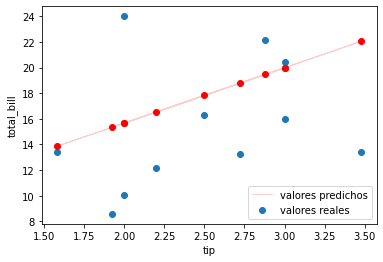

In [39]:
plt.figure()
# tips --> dataset original, scattering de los valores reales

plt.scatter(tip_misbill, tips["total_bill"][missing_bill], label = "valores reales")
# valores predichos
plt.plot(tip_misbill, bill_pred, color="red", linewidth=1, alpha=0.2, label = "valores predichos")
plt.scatter(tip_misbill, bill_pred, color="red")
plt.xlabel("tip")
plt.ylabel("total_bill")
plt.legend(loc = "best")
plt.show()